In [20]:
%store -r df2

In [21]:
# Dans df3, garder toutes les variables sauf 'Cle'

from sklearn.model_selection import train_test_split

X = df2.drop('Cible', axis=1)
y = df2['Cible']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 556 entries, 965 to 125
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Comptes              556 non-null    int8    
 1   Historique_credit    556 non-null    int8    
 2   Epargne              556 non-null    int8    
 3   Objet_credit         556 non-null    int8    
 4   Biens                556 non-null    int8    
 5   Anciennete_emploi    556 non-null    int8    
 6   Statut_domicile      556 non-null    int8    
 7   Age                  556 non-null    int8    
 8   Autres_credits       556 non-null    int8    
 9   Credit_ratio         556 non-null    int8    
 10  Taux_effort          556 non-null    int8    
 11  Situation_familiale  556 non-null    int8    
 12  Cle                  556 non-null    category
dtypes: category(1), int8(12)
memory usage: 19.8 KB


In [22]:
from sklearn.tree import DecisionTreeClassifier
# max_depth : profondeur maximale de l'arbre
# min_samples_split : nombre minimal d'observations pour pouvoir spliter un noeud
# min_samples_leaf : nombre minimal d'observations pour pouvoir créer un noeud
# splitter : critère de split
# random_state : graine pour la reproductibilité

# On instancie notre modèle
tree = DecisionTreeClassifier(
    max_depth=3,
    min_samples_split=2,
    min_samples_leaf=1,
    splitter='best',
    random_state=42,
    )

# On entraine notre modèle
tree.fit(X_train, y_train)

# On prédit les valeurs de y pour X_test
y_pred = tree.predict(X_test)

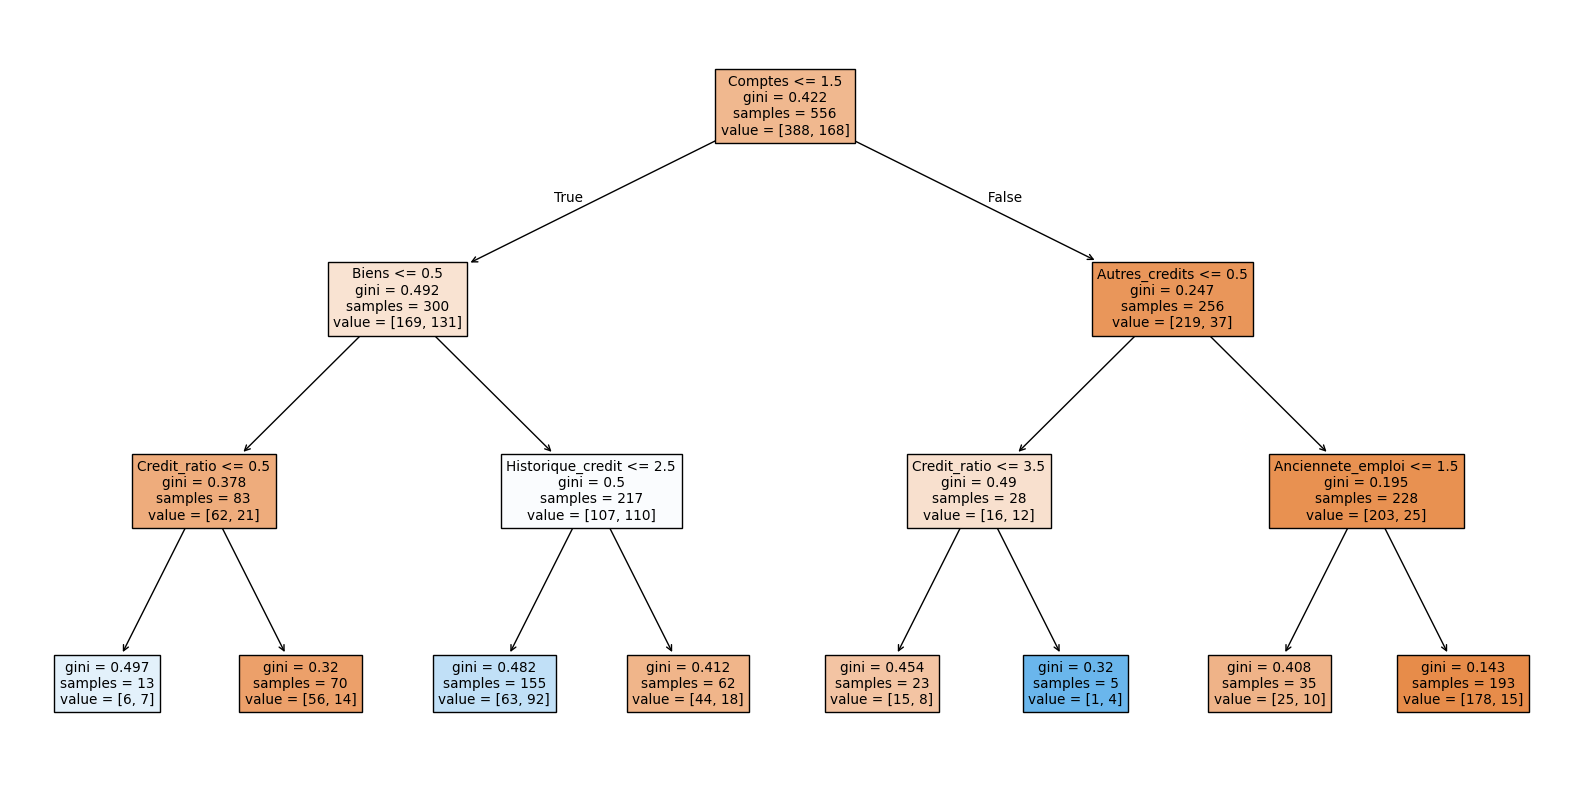

In [23]:
import matplotlib.pyplot as plt  

from sklearn.tree import plot_tree

# On affiche l'arbre
plt.figure(figsize=(20,10))
plot_tree(tree, filled=True, feature_names=X_train.columns)
plt.show()


In [24]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

print("score :",tree.score(X_test, y_test))

# On crée une matrice de confusion
cm = confusion_matrix(y_test, y_pred)
print("Matrice confusion : \n",cm)

# On affiche le rapport de classification
print(classification_report(y_test, y_pred))

score : 0.698744769874477
Matrice confusion : 
 [[129  41]
 [ 31  38]]
              precision    recall  f1-score   support

           0       0.81      0.76      0.78       170
           1       0.48      0.55      0.51        69

    accuracy                           0.70       239
   macro avg       0.64      0.65      0.65       239
weighted avg       0.71      0.70      0.70       239



In [25]:
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix, classification_report
import matplotlib.pyplot as plt


In [ ]:
auc = roc_auc_score(y_test, y_prob)
print("AUC:", auc)